Q1. Solve the following regression problem.
X: 1,2,3,4,5,6
Y:2,4,6,8,10,12
Assume that their relationship is linear y=a+bx.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.arange(1, 7).reshape(-1, 1)
Y=np.array([2, 4, 6, 8, 10, 12]).reshape(-1, 1)

In [3]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [4]:
y_pred=regressor.predict(X)

In [5]:
print(regressor.intercept_, regressor.coef_)

[1.77635684e-15] [[2.]]


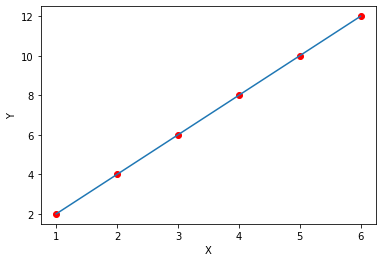

In [6]:
plt.scatter(X, Y, color="red")
plt.plot(X, y_pred)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Q2. Fit the above linear polynomial using ridge regularization.
Take value of c =10.

In [7]:
from sklearn.linear_model import Ridge
regressor=Ridge(alpha=10)
regressor.fit(X, Y)

Ridge(alpha=10)

In [8]:
y_pred_ridge=regressor.predict(X)

In [9]:
print(regressor.intercept_, regressor.coef_)

[2.54545455] [[1.27272727]]


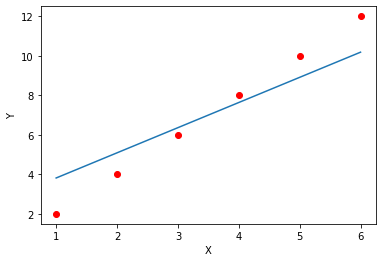

In [10]:
plt.scatter(X, Y, color="red")
plt.plot(X, y_pred_ridge)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Q3.Minimize (x-8)^2+(y-6)^2 using gradient descent method.

In [11]:
def f(x, y):
    return (x-8)**2 + (y-6)**2

def x_derivative(x, y):
    return 2*(x-8)

def y_derivative(x, y):
    return 2*(y-6)

def gradient_descent(learning_rate=0.01, iterations=10000):
    x, y=1, 1
    for _ in range(iterations):
        dx=x_derivative(x, y)
        dy=y_derivative(x, y)

        x=x-learning_rate*dx
        y=y-learning_rate*dy
    return (x, y)

mx, my=gradient_descent()

In [12]:
print(mx, my)

7.999999999999979 5.999999999999979


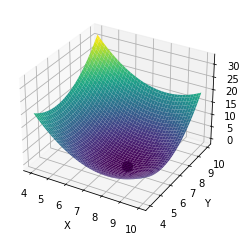

In [13]:
ax=plt.subplot(projection="3d")

x=np.arange(4, 10, 0.05)
y=np.arange(4, 10, 0.05)

x, y=np.meshgrid(x, y)
Z=f(x, y)

plt.xlabel("X")
plt.ylabel("Y")

ax.plot_surface(x, y, Z, cmap="viridis")
ax.scatter3D(mx, my, f(mx, my), color="black", s=100)
plt.show()

Q4. Obtain the performance metrics, MSE, MAE and coefficient of determination for the above regression problem.

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse=mean_squared_error(Y, y_pred)
mae=mean_absolute_error(Y, y_pred)
r2=r2_score(Y, y_pred)
print("For linear regression\n", mse, mae, r2)

For linear regression
 9.532069271420559e-31 6.661338147750939e-16 1.0


In [15]:
mse = mean_squared_error(Y, y_pred_ridge)
mae = mean_absolute_error(Y, y_pred_ridge)
r2 = r2_score(Y, y_pred)
print("For ridge regularization\n", mse, mae, r2)

For ridge regularization
 1.5426997245179048 1.0909090909090902 1.0


Q5. Solve the regression in Q1. Using gradient descent method.

In [16]:
def error(a, b):
    y_pred=a+b*x
    return sum((Y-y_pred)**2)/(2*len(X))

def x_derivative(a, b):
    n=len(Y)
    return -(sum(Y)-a*n-b*sum(X))

def y_derivative(a, b):
    n=len(y)
    return -(X.T.dot(Y)-a*sum(X)-b*X.T.dot(X))

def gradient_descent(learning_rate=0.01, iterations=1000):
    a, b=0, 0
    for _ in range(iterations):
        a=a-learning_rate*x_derivative(a, b)
        b=b-learning_rate*y_derivative(a, b)
    return a[0][0], b[0][0]

In [17]:
a, b=gradient_descent()

In [70]:
print(a, b)

4.4859801028061195e-06 1.999998963583139


In [18]:
y_pred=a+b*X

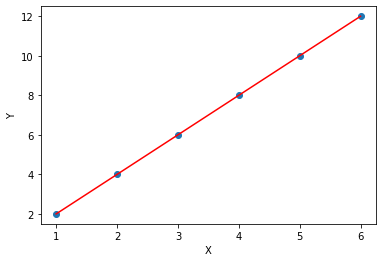

In [19]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Q6. Plot the error curve for the polynomial y=bx for the given data. Vary b on the range
(0, 2, 0.1).
a) Verify that whether the shape of error curve is convex or not.
b) Plot error surface for y=a +bx.


In [20]:
B=np.arange(0, 3, 0.1)
error=[]

for b in B:
    y_pred=b*X
    e=sum((Y-y_pred)**2)/len(Y)
    error.append(e)

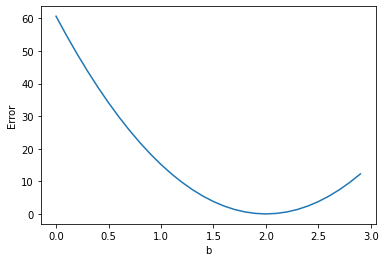

In [21]:
error=np.array(error)
plt.plot(B, error)
plt.xlabel("b")
plt.ylabel("Error")
plt.show()

In [22]:
A=np.arange(0, 3, 0.1)
B=np.arange(0, 3, 0.1)

A, B=np.meshgrid(A, B)

error=[]
x, y=[], []
for a in A:
    for b in B:
        y_pred=a+b*X
        x.append(a)
        y.append(b)
        e=sum((Y-y_pred)**2)/len(Y)
        error.append(e)

In [23]:
print(len(error))

900


In [27]:
error=np.array(error)
A=np.array(x)
B=np.array(y)


In [28]:
print(len(B))

900


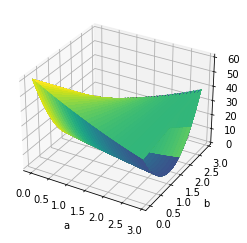

In [31]:
ax = plt.axes(projection="3d")
ax.plot_surface(A, B, error, cmap="viridis")
ax.set_xlabel('a')
ax.set_ylabel('b')
plt.show()